In [1]:
###   Importação de bibliotecas   ###

In [1]:
import supercon_dados as tsd
import supercon_funcoes_apoio_ML as tsf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
### Divisão dos dados que serão usados em um processão de validação cruzada para obtenção de melhores parâmetros  ###

In [3]:
X_treino, X_teste, Y_treino, Y_teste = tsf.divisao_dados_treinamento(0.2,tsd.X_modelagem,tsd.Y_modelagem)

In [4]:
###   Processo de validação cruzada visando a obtenção de melhores parâmetros   ###
###   O processo trabalha sobre as funções criadas no arquivo TCC_supercon_funcoes_apoio_M   ###

In [5]:
###   Chamando a classe para o processo   ###

lin_reg = LinearRegression()

In [6]:
###   Parâmetros a serem avalizados   ###

parametros = [{'normalize':[False]},{'normalize':[True]}]

In [7]:
###   Processo de validação cruzada (busca de parâmetros)   ###

avaliacao_parametros = tsf.obter_parametros(lin_reg, parametros, X_treino,X_treino)
avaliacao_parametros.best_params_

{'normalize': False}

In [8]:
###   Treina o modelo com os melhores prâmetros   ###

lin_reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
lin_reg.fit(X_treino,Y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
###   Coeficientes da regressão linear provenientes do treinamento do modelo   ###


print('\n Termo independente no modelo linear: \n', lin_reg.intercept_,' \n Coeficientes estimados para o problema de regressão linear: \n ', lin_reg.coef_)


 Termo independente no modelo linear: 
 -23.309893570333543  
 Coeficientes estimados para o problema de regressão linear: 
  [-3.72715797e+00  8.81921688e-01 -9.58407342e-01 -5.28553078e-01
  6.88340802e-01 -3.54271232e+01  3.08519771e+00  2.24580282e-01
  2.49684261e-02 -6.13016323e-01  1.27513322e-01  1.35730661e-01
 -1.88385192e-01 -1.27252228e-01  2.10272410e-01 -1.16626393e+02
  4.29300863e+01  6.92476751e-02  2.36272156e-02 -1.94204428e-01
 -2.54501866e-02 -4.60462320e-01  3.14653131e+00  1.27411808e-01
 -2.74512155e+00  8.12301617e+01  4.36057280e+01  1.75619417e-01
 -9.12112273e-02 -3.56179426e-01 -2.87389626e-01 -4.97867436e-03
  1.12451522e-04  1.29760252e-03  2.06587793e-03  1.41937740e+01
 -1.91933850e+01 -1.37390842e-03  5.60779880e-06  5.59174374e-03
 -1.60769994e-03 -1.26625919e-01  4.99541082e-01  1.98105966e-01
 -5.52262810e-01  4.00393627e+00 -2.21816180e+01 -3.63346107e-01
 -1.47868070e-01  1.22791480e+00 -5.12461953e-01  1.53855471e+00
 -1.75386992e+00 -1.39483579

In [10]:
###   Imprime o resultado dos os dados treinados   ###

print('\n R^2: \n', lin_reg.score(X_treino,Y_treino), '\n RMSE : \n',np.sqrt(mean_squared_error(lin_reg.predict(X_treino),Y_treino)))


 R^2: 
 0.7334376120784342 
 RMSE : 
 17.66175070663317


In [11]:
###   Imprime o resultado sobre dados nunca treinados   ###

print('\n R^2: \n', lin_reg.score(X_teste,Y_teste), '\n RMSE : \n',np.sqrt(mean_squared_error(lin_reg.predict(X_teste),Y_teste)))


 R^2: 
 0.7506813394912321 
 RMSE : 
 17.037535793731326


In [12]:
###   Abaixo é mostrado o efeito de um escalonamento nos dados    ###

In [13]:
###   Criação de um padrão que normaliza os dados do conjunto de treinamento   ###

escalonamento = StandardScaler().fit(X_treino)

In [14]:
###   Normaliza o conjunto de treino com base no 'escalonamento'   ###

X_treino_N = escalonamento.transform(X_treino)

In [15]:
###   Normaliza o conjunto de teste   ###


X_teste_N = escalonamento.transform(X_teste)

In [16]:
lin_reg_padrao = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
lin_reg_padrao.fit(X_treino_N,Y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
###   Imprime o resultado dos os dados treinados   ###

print('\n R^2: \n', lin_reg_padrao.score(X_treino_N,Y_treino), '\n RMSE : \n',np.sqrt(mean_squared_error(lin_reg_padrao.predict(X_treino_N),Y_treino)))


 R^2: 
 0.733437612078434 
 RMSE : 
 17.661750706633175


In [18]:
###   Imprime o resultado dos os dados treinados   ###

print('\n R^2: \n', lin_reg_padrao.score(X_teste_N,Y_teste), '\n RMSE : \n',np.sqrt(mean_squared_error(lin_reg_padrao.predict(X_teste_N),Y_teste)))


 R^2: 
 0.7506813394912308 
 RMSE : 
 17.03753579373137


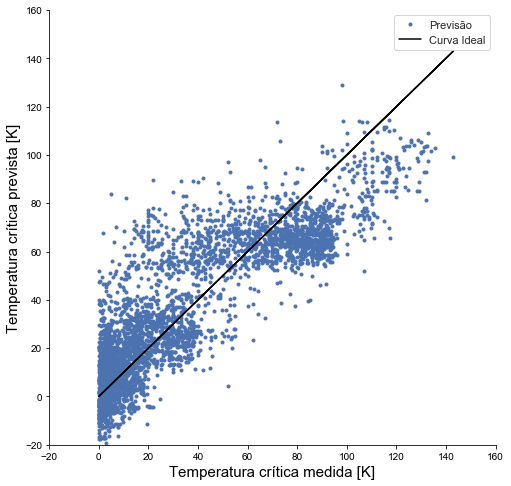

In [19]:
###   Visualização dos resultados de treinamento sobre dados nunca treinados pelo modelo   ###
print_x = Y_teste
print_y = lin_reg.predict(X_teste)

f, ax = plt.subplots(figsize=(8, 8))
# plt.title('Tc prevista pelo modelo vs. Tc medida em laboratório')
sns.set(style="ticks")
sns.despine()

plt.plot(print_x,print_y, 'b.',label = 'Previsão')
plt.plot(print_x,print_x, '-', label = 'Curva Ideal', color = 'black')

plt.xlabel('Temperatura crítica medida [K]',fontsize = 15)
plt.ylabel('Temperatura crítica prevista [K]',fontsize = 15)
plt.legend('Previsão')
plt.legend()
plt.xticks(np.linspace(-20, 160, 10, endpoint=True))
plt.yticks(np.linspace(-20, 160, 10, endpoint=True))
plt.axis([-20,160,-20,160])

plt.savefig('reg_simples_Tp_Tc.png', format='png')

plt.show()